## Analisis con Machine Learning

### Quien esta hablando?


*Nuestro problema*

Identificar a la persona que esta hablando un politico o un medico
Se extrajo la informacion a traves de web scrapping


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Natural Language Tool Kit
pip install nltk

SyntaxError: invalid syntax (3434316059.py, line 2)

In [ ]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [6]:
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

In [7]:
# Descarga informacion necesaria para el pre-procesamiento
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wgsig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
dialogs = pd.read_csv("dialogos.csv", index_col=0)
dialogs["speaker"] = np.where(dialogs["speaker"] == "amlo", "politico", "medico")
dialogs.head()

,speaker,dialog,length
0,politico,"Amigas, amigos, paisanas, paisanos de Palenque:",47
1,politico,Me da mucho gusto estar de nuevo en trabajos d...,91
2,politico,"Antes de entrar en materia, quiero enviar un s...",471
3,politico,Di la instrucción de que se mantengan trabajan...,338
4,politico,"Quiero decirles a mis paisanos que padecen, qu...",113


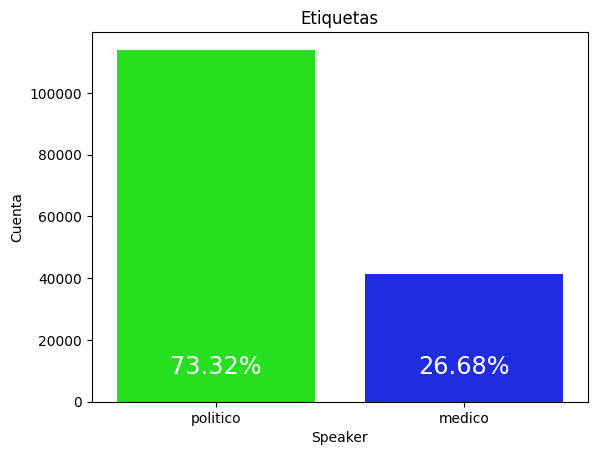

In [9]:
fig = plt.figure(dpi=100)
ax = fig.gca()


sns.countplot(x='speaker', data=dialogs, ax=ax, hue='speaker',palette='hsv')
ax.set_title("Etiquetas")
ax.set_xlabel("Speaker")
ax.set_ylabel("Cuenta")

percentages = (dialogs["speaker"].value_counts()/ len(dialogs)).to_dict()
xs={label.get_text():idx for idx, label in enumerate(ax.get_xticklabels())}
for label, pct in percentages.items():
    ax.text(xs[label], 9000, f"{pct:0.2%}", ha='center', fontsize='xx-large', c='white')
    pass

<Axes: xlabel='length', ylabel='speaker'>

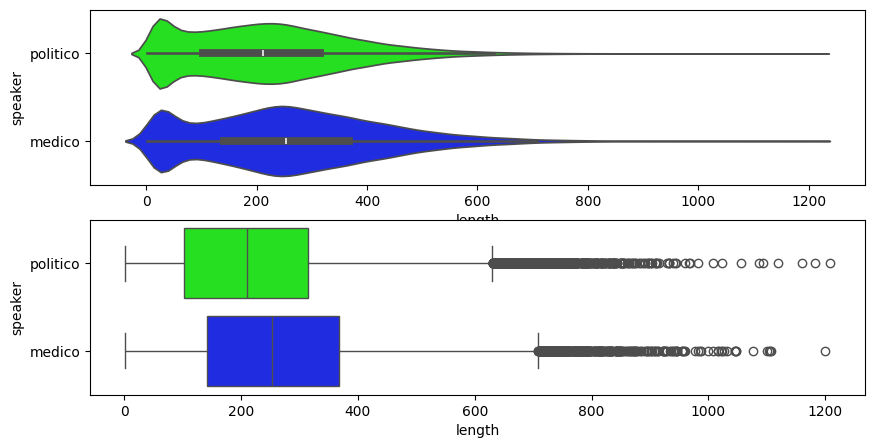

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=100, figsize=(10,5))

sns.violinplot(y="speaker", x="length", data=dialogs, ax=ax1, hue='speaker',palette='hsv')
sns.boxplot(y="speaker", x="length", data=dialogs, ax=ax2, hue='speaker',palette='hsv')

C:\Users\wgsig\AppData\Local\Temp\ipykernel_23880\3615393147.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(_y)}-{int(_x)}" for _x,_y in zip(bins[1:], bins[:-1])], rotation=90, fontsize=9)


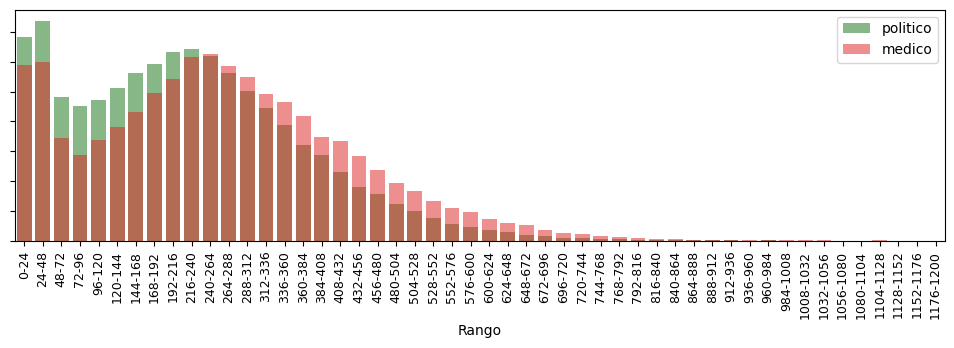

In [11]:
fig = plt.figure(dpi=100, figsize=(12, 3))
ax = fig.gca()

for label, color in [("politico", "green"), ("medico", "red") ]:
    lengths = dialogs[dialogs["speaker"] == label]
    values, bins = np.histogram(lengths["length"], range=(0, 1200), bins = 50 )
    y= (bins[1:] + bins[:-1]) / 2
    sns.barplot(x=y, y=values/ len(lengths), label= label, color=color, ax=ax, alpha= 0.5)

ax.set_xticklabels([f"{int(_y)}-{int(_x)}" for _x,_y in zip(bins[1:], bins[:-1])], rotation=90, fontsize=9)
ax.set_yticklabels([])
ax.set_xlabel("Rango")
ax.legend()

### Dividir el data set para ser el conjunto de prueba o validacion, esto para validar el modelo

In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
rest, test = train_test_split(dialogs, test_size=0.2, stratify=dialogs["speaker"])

In [15]:
train, val = train_test_split(rest, test_size=0.2, stratify=rest["speaker"])

In [16]:
len(train), len(val), len(test), len(rest)

(99524, 24881, 31102, 124405)

In [17]:
dialogs_train = train["dialog"]
dialogs_val = val["dialog"]
dialogs_test = test["dialog"]

target_train = train["speaker"]
target_val  = val["speaker"]
target_test  = test["speaker"]

# Feature engineering

In [18]:
# Etiquetas deben convertirse en numeros
train_y = np.where(target_train == "politico", 1, 0)
val_y = np.where(target_val == "politico", 1, 0)
test_y = np.where(target_test == "politico", 1, 0)


In [19]:
train_y

array([1, 0, 1, ..., 1, 1, 1])

In [20]:
dialogs_train.values

array(['El viernes salió. ¿Les ponemos la encuesta? Ponla, porque ni modo que van a decir que yo la mandé a hacer.',
       'En la siguiente secuencia de 64 diapositivas vamos a estar viendo lo siguiente. Explico para cualquier persona que no esté familiarizada con las curvas epidémicas cómo se interpretan o como se visualizan las curvas epidémicas. La curva epidémica es una de las formas de presentar los datos más usada en la epidemiología y consiste en lo siguiente:',
       'También ya se están beneficiando con el programa de Precios de Garantía 95 productores de Jerez. Aquí aprovecho para decirles que vamos a mantener este programa, Precios de Garantía, sobre todo para los productores de frijol de Zacatecas.',
       ...,
       'Uno de los creadores de ese programa está aquí, fue Ignacio Ovalle, que fue director en ese entonces de Coplamar, y comenzó el programa como IMSS-Coplamar, porque hasta entonces el IMSS no atendía a población abierta, sólo atendía a los derechohabientes, a

In [21]:
dialogs_train.sample(10, random_state=132).values

array(['Lo que se necesite.',
       'Me vacuno la semana próxima, me voy a vacunar. No les voy a decir porque no quiero que se haga un espectáculo, nada más voy a ir a donde me corresponde y me voy a vacunar.',
       'Termino este tema para entrar en otro, que tiene que ver con los compromisos de cambio y de transformación para Tabasco y para México.',
       'Debe quedar muy claro, sin embargo, que la decisión del Gobierno de México, la decisión e instrucción del presidente Andrés Manuel López Obrador es garantizar el acceso universal y gratuito de las vacunas COVID para toda la población mexicana.',
       '¿Qué le pido, no sólo a mis paisanos tabasqueños, a los campesinos, que tienen las tierras donde están los campos de petróleo, a los indígenas?, también ¿qué le pido a los obreros, a los ingenieros, a los técnicos de Pemex?',
       'Los virus ARN tienen una tasa de mutación, es decir, la velocidad a la que van transformando su secuencia genética y por consiguiente su estructura

In [22]:
# Entendiendo el procesamiento de la cadena
example_sentence= dialogs_train.iloc[80567]
print(example_sentence)

Y estos parques industriales van a contar con gas barato, con energía eléctrica también a precios accesibles y en cada parque industrial va a haber un apoyo fiscal, es decir, se van a reducir los impuestos, el Impuesto Sobre la Renta y el IVA, para que se instalen empresas con el propósito principal de que se generen empleos, que haya trabajo, que el corredor del istmo se convierta en una cortina para el desarrollo, para que se quede la gente a trabajar en esta franja de nuestro territorio y no tengan que ir por necesidad a buscarse la vida a otros lugares. Ese es el propósito de este proyecto, vamos a seguirlo impulsando.


### Tokenizacion

In [23]:
#Tokenizar las palabras 
example_sentence.split()

['Y',
 'estos',
 'parques',
 'industriales',
 'van',
 'a',
 'contar',
 'con',
 'gas',
 'barato,',
 'con',
 'energía',
 'eléctrica',
 'también',
 'a',
 'precios',
 'accesibles',
 'y',
 'en',
 'cada',
 'parque',
 'industrial',
 'va',
 'a',
 'haber',
 'un',
 'apoyo',
 'fiscal,',
 'es',
 'decir,',
 'se',
 'van',
 'a',
 'reducir',
 'los',
 'impuestos,',
 'el',
 'Impuesto',
 'Sobre',
 'la',
 'Renta',
 'y',
 'el',
 'IVA,',
 'para',
 'que',
 'se',
 'instalen',
 'empresas',
 'con',
 'el',
 'propósito',
 'principal',
 'de',
 'que',
 'se',
 'generen',
 'empleos,',
 'que',
 'haya',
 'trabajo,',
 'que',
 'el',
 'corredor',
 'del',
 'istmo',
 'se',
 'convierta',
 'en',
 'una',
 'cortina',
 'para',
 'el',
 'desarrollo,',
 'para',
 'que',
 'se',
 'quede',
 'la',
 'gente',
 'a',
 'trabajar',
 'en',
 'esta',
 'franja',
 'de',
 'nuestro',
 'territorio',
 'y',
 'no',
 'tengan',
 'que',
 'ir',
 'por',
 'necesidad',
 'a',
 'buscarse',
 'la',
 'vida',
 'a',
 'otros',
 'lugares.',
 'Ese',
 'es',
 'el',
 'prop

In [24]:
from nltk.tokenize.toktok import ToktokTokenizer

tk_tokenizer = ToktokTokenizer()

In [25]:
tokens = tk_tokenizer.tokenize(example_sentence)
print(type(tokens))
print('# '.join(tokens))

<class 'list'>
Y# estos# parques# industriales# van# a# contar# con# gas# barato# ,# con# energía# eléctrica# también# a# precios# accesibles# y# en# cada# parque# industrial# va# a# haber# un# apoyo# fiscal# ,# es# decir# ,# se# van# a# reducir# los# impuestos# ,# el# Impuesto# Sobre# la# Renta# y# el# IVA# ,# para# que# se# instalen# empresas# con# el# propósito# principal# de# que# se# generen# empleos# ,# que# haya# trabajo# ,# que# el# corredor# del# istmo# se# convierta# en# una# cortina# para# el# desarrollo# ,# para# que# se# quede# la# gente# a# trabajar# en# esta# franja# de# nuestro# territorio# y# no# tengan# que# ir# por# necesidad# a# buscarse# la# vida# a# otros# lugares.# Ese# es# el# propósito# de# este# proyecto# ,# vamos# a# seguirlo# impulsando# .


- Stopwords
- Signos puntuacion
- Palabras con acentos o tildes

In [26]:
# Conseguir StopWords para separar palabras no procedentes
sp_stopwords = stopwords.words("spanish")

sp_punctuation = string.punctuation + '¿¡'

not_deseados = set((unidecode(word) for word in sp_stopwords)) | set(sp_punctuation)


In [27]:
tk_tokenizer = ToktokTokenizer()
def tokenize(sentence):
    lista_limpia = []
    clean_sentence = unidecode(sentence)
    for token_ in tk_tokenizer.tokenize(clean_sentence):
        token = token_.lower()
        if token in not_deseados:
            continue
        lista_limpia.append(token)
    return lista_limpia

In [28]:
print(tokenize(example_sentence))

['parques', 'industriales', 'van', 'contar', 'gas', 'barato', 'energia', 'electrica', 'precios', 'accesibles', 'cada', 'parque', 'industrial', 'va', 'haber', 'apoyo', 'fiscal', 'decir', 'van', 'reducir', 'impuestos', 'impuesto', 'renta', 'iva', 'instalen', 'empresas', 'proposito', 'principal', 'generen', 'empleos', 'trabajo', 'corredor', 'istmo', 'convierta', 'cortina', 'desarrollo', 'quede', 'gente', 'trabajar', 'franja', 'territorio', 'ir', 'necesidad', 'buscarse', 'vida', 'lugares.', 'proposito', 'proyecto', 'vamos', 'seguirlo', 'impulsando']


## Vectorizacion

In [29]:
# Se crean columnas para cada palabra y cada fila son si aparece esa palabra por columna
## One Hot Encoding (Sirve tambien para setear variables categoricas en vectores)

from sklearn.feature_extraction.text import CountVectorizer




In [30]:
#vectorizador_ejemplo = CountVectorizer(binary=True, analyzer=tokenize, max_features=4000) #Se le pasa a analizer el nombre de la funcion



In [31]:
vectorizador_ejemplo = CountVectorizer(binary=True, analyzer=tokenize) #Sin limite, si se coloca False en binary cuenta las ocurrencias

In [32]:
ejemplo = [
    "Red Neuronal desde cero",
    "Se crean columnas para cada palabra y cada fila son si aparece esa"
]
vectors = vectorizador_ejemplo.fit_transform(ejemplo)


vocabulary = vectorizador_ejemplo.vocabulary_
columns = [token for token, _ in sorted(vocabulary.items(), key=lambda item: item[1])]
pd.DataFrame(vectors.todense(), columns=columns, index=[1, 2])

,aparece,cada,cero,columnas,crean,fila,neuronal,palabra,red
1,0,0,1,0,0,0,1,0,1
2,1,1,0,1,1,1,0,1,0


In [33]:
vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize)

## Convertir texto a tokens

In [34]:
vectorizador_real.fit(dialogs_train) # con esto se prepara el modelo de entrenamiento para el siguiente paso, solo se prepara con los datos de entrada

CountVectorizer(analyzer=<function tokenize at 0x0000019676EBF250>, binary=True)

In [35]:
train_x= vectorizador_real.transform(dialogs_train)
val_x= vectorizador_real.transform(dialogs_val)  # Datos de validacion
test_x=  vectorizador_real.transform(dialogs_test) # Datos de prueba 

In [36]:
train_x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1671219 stored elements and shape (99524, 59316)>

In [37]:
vectorizador_real.vocabulary_

{'viernes': 58341,
 'salio.': 51437,
 '?les': 2348,
 'ponemos': 44010,
 'encuesta': 23126,
 'ponla': 44073,
 'modo': 38332,
 'van': 57623,
 'decir': 17829,
 'mande': 36407,
 'hacer': 29765,
 'siguiente': 52683,
 'secuencia': 51888,
 '64': 1717,
 'diapositivas': 20463,
 'vamos': 57619,
 'viendo': 58318,
 'siguiente.': 52685,
 'explico': 26236,
 'cualquier': 16968,
 'persona': 42987,
 'familiarizada': 26977,
 'curvas': 17495,
 'epidemicas': 24103,
 'interpretan': 33343,
 'visualizan': 58668,
 'epidemicas.': 24104,
 'curva': 17492,
 'epidemica': 24100,
 'formas': 27902,
 'presentar': 44954,
 'datos': 17634,
 'usada': 57236,
 'epidemiologia': 24110,
 'consiste': 15107,
 'beneficiando': 9579,
 'programa': 45750,
 'precios': 44490,
 'garantia': 28603,
 '95': 2131,
 'productores': 45649,
 'jerez.': 34102,
 'aqui': 7137,
 'aprovecho': 7039,
 'decirles': 17836,
 'mantener': 36592,
 'frijol': 28222,
 'zacatecas': 59171,
 'acaba': 2925,
 'comentar': 13289,
 'conocimos': 14871,
 'hace': 29749,
 'e

In [38]:
type(train_x)

scipy.sparse._csr.csr_matrix

## Modelado

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
train_y.shape

(99524,)

In [41]:
train_x.shape

(99524, 59316)

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(train_x, train_y)

LogisticRegression()

In [44]:
train_pred = lr.predict(train_x)  #Para diagnosticar overfitting (fenómeno que ocurre en el aprendizaje automático cuando un modelo se ajusta demasiado bien a los datos de entrenamiento)

In [45]:
val_pred = lr.predict(val_x) #Para decidir cambios sobre el modelo

In [46]:
from sklearn.metrics import accuracy_score, classification_report


In [47]:
accuracy_score(train_y, train_pred)

0.9795325750572726

In [48]:
print(classification_report(train_y, train_pred)) #Para identificar la calidad de datos entrenamiento

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     26552
           1       0.98      0.99      0.99     72972

    accuracy                           0.98     99524
   macro avg       0.98      0.97      0.97     99524
weighted avg       0.98      0.98      0.98     99524



In [49]:
accuracy_score(val_y, val_pred)

0.9641493509103332

In [50]:
print(classification_report(val_y, val_pred))  # Datos de validacion

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6638
           1       0.97      0.98      0.98     18243

    accuracy                           0.96     24881
   macro avg       0.96      0.95      0.95     24881
weighted avg       0.96      0.96      0.96     24881



## Test Dataset

In [51]:
test_pred = lr.predict(test_x)
test_accuracy = accuracy_score(test_y, test_pred)

print(f"Test Accuracy: {test_accuracy:0.2%}")

Test Accuracy: 96.38%


### Ejemplo propio

In [ ]:
oracion = "Quedate en casa, la curva epidemica no se ha reducido"

own_x = vectorizador_real.transform([oracion])

result = lr.predict(own_x)

if result == 0:
    print("Habla un médico")
elif result ==1:
    print("Habla un político")


Habla un medico


In [53]:
medico, politico = lr.predict_proba(own_x).squeeze()*100

In [54]:
medico, politico

(np.float64(95.09231551043212), np.float64(4.907684489567883))

Queda como tarea rehacer el data set e investigar nuevos algoritmos para el modelo
